<a href="https://colab.research.google.com/github/parkjh21c/ML-DL/blob/main/smarthon_model_3%EC%B0%A8_%EB%AA%A8%EB%8D%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/smarthon/data.xlsx')

df['일자'] = pd.to_datetime(df['일자'])

# 데이터 순서 뒤집고 인덱스 다시 정의
df = df.sort_index(ascending=False)
df = df.reset_index(drop=True)
df = df.set_index('일자')

df

,종가,대비,등락률,시가,고가,저가,거래량,거래대금,시가총액,상장주식수,...,외국인 보유수량,외국인 지분율,외국인 한도수량,외국인 한도소진율,공매도 수량_거래량_전체,공매도 수량_순보유잔고수량,공매도 금액_거래대금_전체,공매도 금액_순보유잔고금액,감정,등락
일자,,,,,,,,,,,,,,,,,,,,,
2023-01-02,76138,0,0.00,76552,78621,75000,691041,51302865100,3726370000000,50630000,...,12069472,23.84,50630000,23.84,63513,171768,4688569400,12642124800,2.810615,0
2023-01-03,73862,-2276,-2.99,76138,76966,72414,851220,60766095500,3614980000000,50630000,...,11960663,23.62,50630000,23.62,71153,188146,5085308900,13433624400,1.000928,1
2023-01-04,74276,414,0.56,74069,74586,71586,555372,39384977200,3635230000000,50630000,...,11991757,23.69,50630000,23.69,52306,203048,3699538300,14578846400,5.996917,0
2023-01-05,69103,-5173,-6.96,74379,74897,67862,1516452,103072000000,3382080000000,50630000,...,12008255,23.72,50630000,23.72,170021,318005,11533673100,21242734000,10.533066,1
2023-01-06,69310,207,0.30,68276,70552,68069,528494,35514686400,3392210000000,50630000,...,11674802,23.06,50630000,23.06,24007,270666,1606169300,18134622000,-1.994238,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-23,326000,21000,6.89,306500,328500,306500,336668,107690000000,14859500000000,45581161,...,19749349,43.33,45581161,43.33,473,13701,153055500,4466526000,5.337592,0
2024-12-24,324000,-2000,-0.61,329000,330000,320500,179574,58184245500,14768300000000,45581161,...,19822787,43.49,45581161,43.49,195,13701,62993500,4439124000,2.378068,0
2024-12-26,323500,-500,-0.15,324000,327000,316500,186277,60108541000,14745500000000,45581161,...,19778192,43.39,45581161,43.39,837,11551,270263000,3736748500,8.889689,0


필요하면 추가로 넣어도 될듯? (ex. kospi, 방위 종목)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 489 entries, 2023-01-02 to 2024-12-30
Data columns (total 28 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   종가              489 non-null    int64  
 1   대비              489 non-null    int64  
 2   등락률             489 non-null    float64
 3   시가              489 non-null    int64  
 4   고가              489 non-null    int64  
 5   저가              489 non-null    int64  
 6   거래량             489 non-null    int64  
 7   거래대금            489 non-null    int64  
 8   시가총액            489 non-null    int64  
 9   상장주식수           489 non-null    int64  
 10  EPS             489 non-null    int64  
 11  PER             489 non-null    float64
 12  선행 EPS          489 non-null    int64  
 13  선행 PER          489 non-null    float64
 14  BPS             489 non-null    int64  
 15  PBR             489 non-null    float64
 16  주당배당금           489 non-null    int64  
 17  배당수익률           

주가 그래프(2023/01/01 - 2024/12/31)   
index - 일자, 종가 column 필요

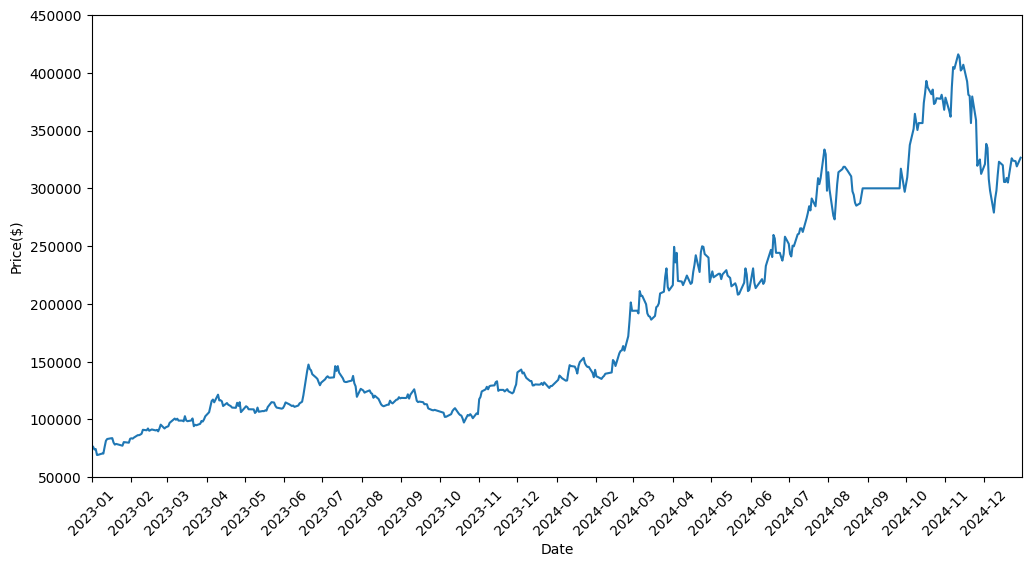

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


plt.figure(figsize=(12,6))
plt.plot(df.index, df['종가'])

plt.xlabel('Date')
plt.ylabel('Price($)')

# x축 범위 설정
plt.xlim(pd.Timestamp('2023-01-01'), pd.Timestamp('2024-12-31'))

# x축 눈금 설정
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

# x축 레이블 회전
plt.xticks(rotation=45)

plt.yticks([50000, 100000, 150000, 200000, 250000, 300000, 350000, 400000, 450000])

plt.show()

LSTM + 랜덤포레스트

1. 데이터 분리(섞기 X)   


In [ ]:
from sklearn.model_selection import train_test_split

target_column = df.columns[-1]

X = df.drop(target_column, axis=1)
y = df[target_column]

train_size = int((len(X) - 1) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]


랜덤 포레스트를 통해 중요한 특징 찾기   
( feature_importances_ : 해당 피처가 클래스를 나누는데 얼마나 영향을 미쳤는지를 0 ~ 1로 표기하는 척도)    


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

# 랜덤 포레스트
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# 중요한 특징 선택
important_features = rf.feature_importances_

important_features를 그래프로 나타내어 중요도 비교

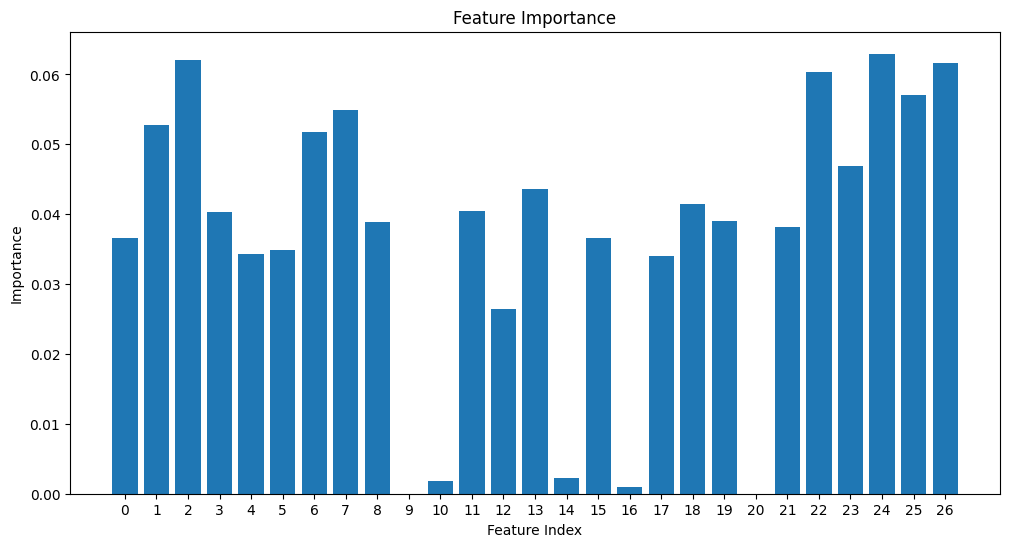

In [ ]:
plt.figure(figsize=(12,6))
plt.bar(important_features.argsort(), important_features[important_features.argsort()])
plt.xticks(np.arange(len(important_features)))
plt.xlabel('Feature Index')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.show()

대비 등락률 => 추세 때문에 높은 연관성(예상)


위 Features들을 높은 순서대로 정렬한 뒤, 20위 까지 선택

In [ ]:
top_features_indices = important_features.argsort()[-20:][::-1] # Feature 선택 수를 변경하고 싶을 시 변경 필요
X_train = X_train.iloc[:,top_features_indices]
X_test = X_test.iloc[:,top_features_indices]
X_train.columns

Index(['공매도 금액_거래대금_전체', '등락률', '감정', '공매도 수량_거래량_전체', '공매도 금액_순보유잔고금액',
       '거래대금', '대비', '거래량', '공매도 수량_순보유잔고수량', '선행 PER', '외국인 보유수량', 'PER',
       '시가', '외국인 지분율', '시가총액', '외국인 한도소진율', 'PBR', '종가', '저가', '고가'],
      dtype='object')

시가 총액, 상장 주식수, BPS(주당순자산가치), 주당배당금, 외국인 한도수량 은 거의 상관 없거나 아예 상관 없는걸로 보임

In [ ]:
#A, B, C, D
A_train_size = int((len(X_train) - 1)*0.7)
X_A_train, X_C_val = X_train[:A_train_size], X_train[A_train_size:]
y_B_train, y_D_val = y_train[:A_train_size], y_train[A_train_size:]

In [ ]:
print(len(X_A_train), len(y_B_train))
print(len(X_C_val), len(y_D_val))

272 272
118 118


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# 데이터 스케일링
scaler = MinMaxScaler()
A_scaled_data = scaler.fit_transform(X_A_train)

# 시퀀스 생성 함수
def create_sequences(data, label, seq_length):
    X, y = [], []
    for i in range(len(data)-seq_length):
        seq = data[i:(i+seq_length)]
        X.append(seq)
        y.append(label[i+seq_length])
    return np.array(X), np.array(y)

def create_sequences_without_y(data, seq_length):
    sequences = []
    for i in range(len(data) - seq_length):
        seq = data[i:i + seq_length]
        sequences.append(seq)
    return np.array(sequences)

# 시퀀스 생성
X_s, y_s = create_sequences(A_scaled_data, y_B_train, seq_length=10)

X_s_train, X_s_test, y_s_train, y_s_test = train_test_split(X_s, y_s, test_size=0.2, shuffle=False)

<ipython-input-10-fc9b71ea5446>:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y.append(label[i+seq_length])


In [ ]:
print(len(X_train), len(y_train))
print(len(X_s), len(y_s))
print(len(X_s_train), len(y_s_train))
print(len(X_s_test), len(y_s_test))

390 390
262 262
209 209
53 53


결과적으로 전체에서 10개의 데이터가 빠진 형태

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout


model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_s_train.shape[1], X_s_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1, activation='sigmoid'))  # 이진 분류 문제의 경우 sigmoid 활성화 함수 사용

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])  # Adam 옵티마이저와 이진 크로스엔트로피 손실 사용

# 모델 학습
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history = model.fit(
    X_s_train, y_s_train,
    epochs=50, batch_size=32,
    validation_data=(X_s_test, y_s_test),
    callbacks=[early_stopping]
)


Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 8s 203ms/step - accuracy: 0.4211 - loss: 0.7041 - val_accuracy: 0.5283 - val_loss: 0.6924
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.5108 - loss: 0.6945 - val_accuracy: 0.4717 - val_loss: 0.6944
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.5600 - loss: 0.6881 - val_accuracy: 0.4717 - val_loss: 0.6970
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.5383 - loss: 0.6925 - val_accuracy: 0.4717 - val_loss: 0.6952
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.4717 - loss: 0.6993 - val_accuracy: 0.5283 - val_loss: 0.6913
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.5447 - loss: 0.6910 - val_accuracy: 0.5283 - val_loss: 0.6910
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.5186 - loss: 0.6887 - val_accuracy: 0.4717 - val_loss: 0.6947
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.5289 - loss: 0.6879 - val_accuracy: 0.4717 - val_loss: 0.6982

scaled_data_test

In [ ]:
C_scaled_data = scaler.fit_transform(X_C_val)

C_val, D_val = create_sequences(C_scaled_data, y_D_val,seq_length=10)

C_pred_lstm = model.predict(C_val)
print(C_pred_lstm)

<ipython-input-10-fc9b71ea5446>:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y.append(label[i+seq_length])


4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 210ms/step
[[0.5647736 ]
 [0.565629  ]
 [0.5664238 ]
 [0.56683123]
 [0.5670147 ]
 [0.56720674]
 [0.56555974]
 [0.56492335]
 [0.56380457]
 [0.56233895]
 [0.56057465]
 [0.55707514]
 [0.5543554 ]
 [0.5524525 ]
 [0.5520463 ]
 [0.5524892 ]
 [0.5533996 ]
 [0.5525995 ]
 [0.55373496]
 [0.55462056]
 [0.5557074 ]
 [0.5565229 ]
 [0.5564297 ]
 [0.5544968 ]
 [0.5530258 ]
 [0.55191255]
 [0.55029726]
 [0.54869455]
 [0.5484253 ]
 [0.54564893]
 [0.54498845]
 [0.54367405]
 [0.5446887 ]
 [0.54742056]
 [0.5486446 ]
 [0.5496081 ]
 [0.54849595]
 [0.54934204]
 [0.5490675 ]
 [0.54853183]
 [0.54780436]
 [0.5473296 ]
 [0.54658574]
 [0.54597783]
 [0.5452895 ]
 [0.5429692 ]
 [0.5429894 ]
 [0.54270595]
 [0.5420524 ]
 [0.5424768 ]
 [0.54119265]
 [0.54151994]
 [0.5414392 ]
 [0.5411765 ]
 [0.54067385]
 [0.53985584]
 [0.53915256]
 [0.5397317 ]
 [0.53955674]
 [0.54025865]
 [0.5413117 ]
 [0.5427194 ]
 [0.54417133]
 [0.54506713]
 [0.5443587 ]
 [0.544469  ]
 [0.5449274 ]
 [0.54480934]
 [0.54490

4. C, D 추가학습

In [ ]:
# 기존 가중치 저장
weights = model.get_weights()

# 새로운 데이터와 기존 데이터를 합침
combined_X = np.concatenate([X_s, C_val])
combined_y = np.concatenate([y_s, D_val])

# 새로운 모델 구조 생성 (기존 모델과 동일한 구조)
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_s_train.shape[1], X_s_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1, activation='sigmoid'))  # 이진 분류 문제의 경우 sigmoid 활성화 함수 사용
model.set_weights(weights)  # 기존 모델 가중치 로드

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# 다시 학습
history = model.fit(
    combined_X, combined_y,
    epochs=50, batch_size=32,
    callbacks=[early_stopping]
)


Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.4824 - loss: 0.6970
Epoch 2/50
 1/12 ━━━━━━━━━━━━━━━━━━━━ 1s 155ms/step - accuracy: 0.5625 - loss: 0.6851

/usr/local/lib/python3.11/dist-packages/keras/src/callbacks/early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5457 - loss: 0.6895
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5371 - loss: 0.6925
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5473 - loss: 0.6884
Epoch 5/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5814 - loss: 0.6867
Epoch 6/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5535 - loss: 0.6824
Epoch 7/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5915 - loss: 0.6866
Epoch 8/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.5330 - loss: 0.6881
Epoch 9/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5330 - loss: 0.6849
Epoch 10/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5555 - loss: 0.6880
Epoch 11/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5519 - loss: 0.6872
Epoch 12/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5308 - loss: 0.6867
Epoch 13/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5429 - 

Z 예측값 C와 합치기

In [ ]:
X_C_rf_train = X_C_val.iloc[10:]
y_D_rf_train = y_D_val.iloc[10:]
X_C_rf_train

,공매도 금액_거래대금_전체,등락률,감정,공매도 수량_거래량_전체,공매도 금액_순보유잔고금액,거래대금,대비,거래량,공매도 수량_순보유잔고수량,선행 PER,외국인 보유수량,PER,시가,외국인 지분율,시가총액,외국인 한도소진율,PBR,종가,저가,고가
일자,,,,,,,,,,,,,,,,,,,,
2024-02-26,147197000,7.85,23.048583,893,8447281200,265745000000,12517,1634703,50826,16.23,16539520,41.93,161379,32.67,8414710000000,32.67,2.94,171931,161172,173897
2024-02-27,420256900,7.76,1.316751,2309,8355373200,744891000000,13345,4119382,46652,16.52,16666437,45.18,172862,32.92,9067830000000,32.92,3.16,185276,172759,195828
2024-02-28,191646400,8.60,8.118657,993,10444066500,554531000000,15931,2898453,53697,17.32,17076933,49.07,186310,33.73,9847540000000,33.73,3.44,201207,186310,202655
2024-02-29,18793000,-3.60,17.990200,100,9698812500,308367000000,-7241,1612512,51727,17.23,17429151,47.30,202759,34.42,9493130000000,34.42,3.31,193966,192621,210000
2024-03-04,1688800,0.05,1.079733,9,9700045600,148902000000,103,789213,51706,16.25,17478349,47.33,196552,34.52,9498190000000,34.52,3.31,194069,191586,199655
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-07-26,132341000,1.70,6.128970,448,4128255000,176911000000,5172,595132,13830,23.36,19009142,18.54,308276,37.55,15113100000000,37.55,4.28,308793,300000,312931
2024-07-29,574173000,8.04,11.732813,1806,3342067500,260939000000,24828,833331,10363,25.23,18997410,20.03,315000,37.52,16328200000000,37.52,4.62,333621,307241,335172
2024-07-30,290626500,-1.24,9.020453,898,4486391000,338819000000,-4138,1056943,14086,24.92,18995527,19.78,334138,37.52,16125700000000,37.52,4.56,329483,320690,341379


In [ ]:
X_C_rf_train['lstm_feature'] = C_pred_lstm
X_C_rf_train

<ipython-input-17-fe98b221ac2d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_C_rf_train['lstm_feature'] = C_pred_lstm


,공매도 금액_거래대금_전체,등락률,감정,공매도 수량_거래량_전체,공매도 금액_순보유잔고금액,거래대금,대비,거래량,공매도 수량_순보유잔고수량,선행 PER,...,PER,시가,외국인 지분율,시가총액,외국인 한도소진율,PBR,종가,저가,고가,lstm_feature
일자,,,,,,,,,,,,,,,,,,,,,
2024-02-26,147197000,7.85,23.048583,893,8447281200,265745000000,12517,1634703,50826,16.23,...,41.93,161379,32.67,8414710000000,32.67,2.94,171931,161172,173897,0.564774
2024-02-27,420256900,7.76,1.316751,2309,8355373200,744891000000,13345,4119382,46652,16.52,...,45.18,172862,32.92,9067830000000,32.92,3.16,185276,172759,195828,0.565629
2024-02-28,191646400,8.60,8.118657,993,10444066500,554531000000,15931,2898453,53697,17.32,...,49.07,186310,33.73,9847540000000,33.73,3.44,201207,186310,202655,0.566424
2024-02-29,18793000,-3.60,17.990200,100,9698812500,308367000000,-7241,1612512,51727,17.23,...,47.30,202759,34.42,9493130000000,34.42,3.31,193966,192621,210000,0.566831
2024-03-04,1688800,0.05,1.079733,9,9700045600,148902000000,103,789213,51706,16.25,...,47.33,196552,34.52,9498190000000,34.52,3.31,194069,191586,199655,0.567015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-07-26,132341000,1.70,6.128970,448,4128255000,176911000000,5172,595132,13830,23.36,...,18.54,308276,37.55,15113100000000,37.55,4.28,308793,300000,312931,0.521097
2024-07-29,574173000,8.04,11.732813,1806,3342067500,260939000000,24828,833331,10363,25.23,...,20.03,315000,37.52,16328200000000,37.52,4.62,333621,307241,335172,0.520269
2024-07-30,290626500,-1.24,9.020453,898,4486391000,338819000000,-4138,1056943,14086,24.92,...,19.78,334138,37.52,16125700000000,37.52,4.56,329483,320690,341379,0.519016


5. (C + Z), D => rf 학습

In [ ]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_C_rf_train, y_D_rf_train)

RandomForestClassifier(random_state=42)

6. E => lstm 예측

In [ ]:
X_E_test = X[train_size - 10:]
y_E_test = y[train_size - 10:]
X_E_test = X_E_test.iloc[:,top_features_indices]

X_E_test

,공매도 금액_거래대금_전체,등락률,감정,공매도 수량_거래량_전체,공매도 금액_순보유잔고금액,거래대금,대비,거래량,공매도 수량_순보유잔고수량,선행 PER,외국인 보유수량,PER,시가,외국인 지분율,시가총액,외국인 한도소진율,PBR,종가,저가,고가
일자,,,,,,,,,,,,,,,,,,,,
2024-07-19,330870500,3.68,1.494721,1201,2917184500,178595000000,10345,645057,10363,22.03,18854315,17.48,279828,37.24,14252300000000,37.24,4.03,291207,272586,293276
2024-07-22,98053000,-2.31,12.056049,349,2849825000,161522000000,-6724,578974,10363,21.52,18965653,17.08,293276,37.46,13923300000000,37.46,3.94,284483,282931,297931
2024-07-23,113490500,4.36,9.789671,400,2973894000,175866000000,12414,624919,10362,22.46,18840738,17.82,283448,37.21,14530800000000,37.21,4.11,296897,279310,297931
2024-07-24,867184500,4.01,6.679769,2883,3093057000,287222000000,11896,959357,10362,23.36,18914962,18.54,295862,37.36,15113100000000,37.36,4.28,308793,294310,318103
2024-07-25,209033000,-1.68,3.248070,687,4413946500,375386000000,-5172,1242819,15039,22.97,18989700,18.23,309828,37.51,14859900000000,37.51,4.21,303621,300000,323276
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-23,153055500,6.89,5.337592,473,4466526000,107690000000,21000,336668,13701,15.65,19749349,20.24,306500,43.33,14859500000000,43.33,4.67,326000,306500,328500
2024-12-24,62993500,-0.61,2.378068,195,4439124000,58184245500,-2000,179574,13701,15.56,19822787,20.12,329000,43.49,14768300000000,43.49,4.64,324000,320500,330000
2024-12-26,270263000,-0.15,8.889689,837,3736748500,60108541000,-500,186277,11551,15.53,19778192,20.09,324000,43.39,14745500000000,43.39,4.64,323500,316500,327000


In [ ]:
# 전체 테스트 데이터
scaled_E_test = scaler.fit_transform(X_E_test)
E_test, _ = create_sequences(scaled_E_test, y_E_test, seq_length=10)

<ipython-input-10-fc9b71ea5446>:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y.append(label[i+seq_length])


In [ ]:
scaled_E_test.shape

(109, 20)

In [ ]:
E_pred_lstm = model.predict(E_test)
print(E_pred_lstm)

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 149ms/step
[[0.10824174]
 [0.10899151]
 [0.10556431]
 [0.10391452]
 [0.11042079]
 [0.11899058]
 [0.12636642]
 [0.13932809]
 [0.14983554]
 [0.16936396]
 [0.19225396]
 [0.20561406]
 [0.21284454]
 [0.22867905]
 [0.26196685]
 [0.32091686]
 [0.3798524 ]
 [0.41295987]
 [0.4021057 ]
 [0.427992  ]
 [0.48040792]
 [0.54227805]
 [0.61502993]
 [0.66931736]
 [0.6999554 ]
 [0.7266558 ]
 [0.7491531 ]
 [0.7707443 ]
 [0.7847419 ]
 [0.78470063]
 [0.7859582 ]
 [0.787179  ]
 [0.7875186 ]
 [0.78732485]
 [0.7877201 ]
 [0.78727764]
 [0.7868159 ]
 [0.6913468 ]
 [0.57936794]
 [0.47572523]
 [0.34610376]
 [0.23212878]
 [0.17510188]
 [0.15359475]
 [0.16391465]
 [0.1858043 ]
 [0.20003097]
 [0.35980526]
 [0.33323485]
 [0.3732545 ]
 [0.37831202]
 [0.343549  ]
 [0.3421409 ]
 [0.37104774]
 [0.4059506 ]
 [0.45211956]
 [0.4603916 ]
 [0.45481133]
 [0.42270234]
 [0.36278006]
 [0.32432008]
 [0.30794504]
 [0.25729248]
 [0.19974369]
 [0.1827092 ]
 [0.20617698]
 [0.22935301]
 [0.26416546]
 [0.29676

In [ ]:
X_test['lstm_feature']=E_pred_lstm
X_test

,공매도 금액_거래대금_전체,등락률,감정,공매도 수량_거래량_전체,공매도 금액_순보유잔고금액,거래대금,대비,거래량,공매도 수량_순보유잔고수량,선행 PER,...,PER,시가,외국인 지분율,시가총액,외국인 한도소진율,PBR,종가,저가,고가,lstm_feature
일자,,,,,,,,,,,,,,,,,,,,,
2024-08-02,1115925000,-4.78,-0.003649,3824,4075767000,226296000000,-15000,766410,14103,19.43,...,17.95,309310,37.07,14632100000000,37.07,4.14,298966,298966,316552,0.108242
2024-08-05,428449500,-7.61,8.961239,1576,3890190000,352630000000,-22759,1287553,14570,17.79,...,16.58,294828,37.07,13518200000000,37.07,3.83,276207,255517,303103,0.108992
2024-08-06,104407000,-1.12,-2.054622,390,4387680000,361531000000,-3104,1341907,16620,17.59,...,16.39,281897,36.92,13366300000000,36.92,3.78,273103,271034,288621,0.105564
2024-08-07,54947500,5.68,4.870174,196,4636422000,256862000000,15518,931915,16618,18.59,...,17.33,274138,36.52,14125800000000,36.52,4.00,288621,272069,294310,0.103915
2024-08-08,65639000,5.20,1.506829,227,3073532000,251473000000,15000,880321,10472,19.47,...,18.23,289138,36.55,14859900000000,36.55,4.21,303621,280345,305172,0.110421
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-23,153055500,6.89,5.337592,473,4466526000,107690000000,21000,336668,13701,15.65,...,20.24,306500,43.33,14859500000000,43.33,4.67,326000,306500,328500,0.650946
2024-12-24,62993500,-0.61,2.378068,195,4439124000,58184245500,-2000,179574,13701,15.56,...,20.12,329000,43.49,14768300000000,43.49,4.64,324000,320500,330000,0.643856
2024-12-26,270263000,-0.15,8.889689,837,3736748500,60108541000,-500,186277,11551,15.53,...,20.09,324000,43.39,14745500000000,43.39,4.64,323500,316500,327000,0.634790


In [ ]:
y_pred = rf.predict(X_test)
y_pred

array([1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0])

lstm결과가 기존 데이터 row 개수보다 20개 적으므로 train데이터에서 20개를 제외하고 학습 진행

LSTM + Random Forest 예측 정확도

In [ ]:
from sklearn.metrics import accuracy_score

# 정확도 계산
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")


Accuracy: 42.42%


LSTM 예측 결과 정확도

In [ ]:
lstm_pred = []*len(E_pred_lstm)
for i in range(len(E_pred_lstm)):
  if (i >= 0.5):
    lstm_pred.append(1)
  else:
    lstm_pred.append(0)

accuracy = accuracy_score(y_test, lstm_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 62.63%
